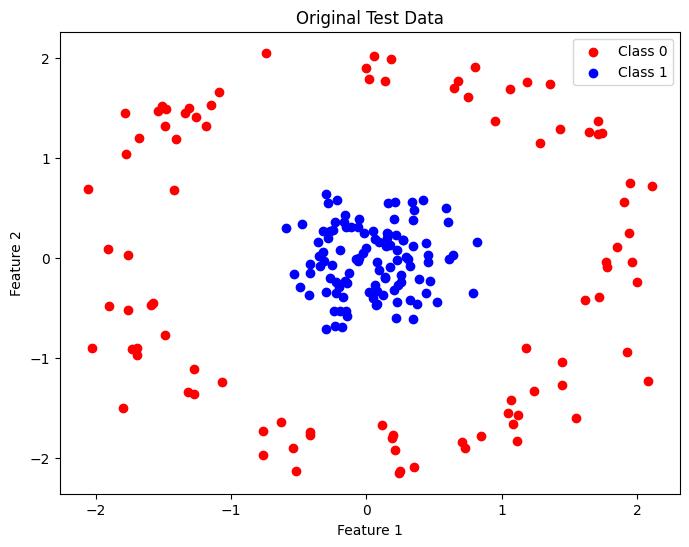

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Generate a synthetic dataset
x_data, y_data = make_circles(n_samples=1000, noise=0.1, factor=0.2, random_state=0)

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=0)

# Standardize the data
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


# Plot the original test data
plt.figure(figsize=(8, 6))
plt.scatter(x_test[y_test == 0][:, 0], x_test[y_test == 0][:, 1], color='red', label='Class 0')
plt.scatter(x_test[y_test == 1][:, 0], x_test[y_test == 1][:, 1], color='blue', label='Class 1')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Original Test Data')
plt.legend()
plt.show()



Accuracy: 0.9800000190734863
6187/6187 [==============================] - 9s 1ms/step


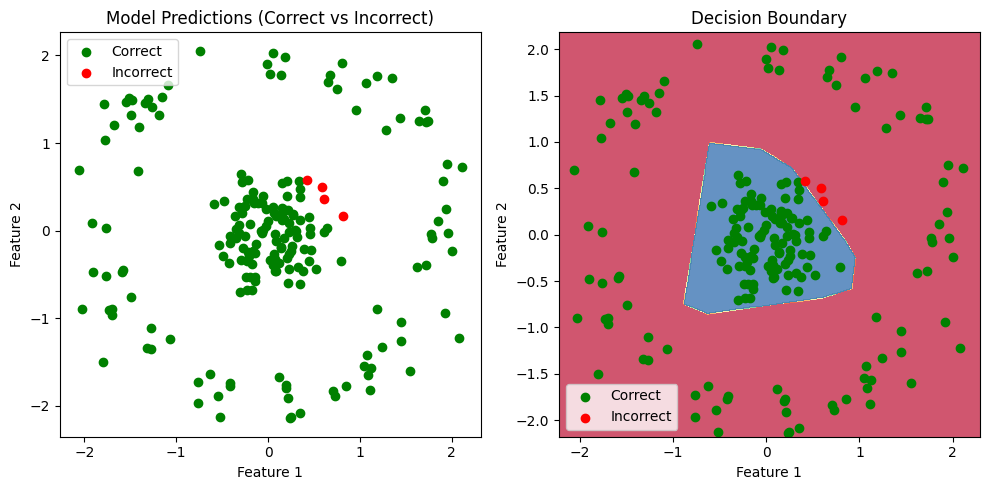

In [ ]:
# Build the model
model = Sequential([
    Dense(4, input_dim=2, activation='relu'),  # Hidden layer with 4 neurons and ReLU activation
    Dense(4, activation='relu'),               # Another hidden layer with 4 neurons and ReLU activation
    Dense(1, activation='sigmoid')             # Output layer with 1 neuron and sigmoid activation
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=50, verbose=0)

# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print('Accuracy:', accuracy)

# Make predictions
predictions = model.predict(x_test)
predictions = (predictions > 0.5).astype(int)  # Convert probabilities to binary output

# Determine correct and incorrect predictions
correct_predictions = predictions == y_test.reshape(-1, 1)
incorrect_predictions = predictions != y_test.reshape(-1, 1)

# Plot the original data
plt.figure(figsize=(10, 5))

# Plot correct predictions
plt.subplot(1, 2, 1)
plt.scatter(x_test[correct_predictions.flatten(), 0], x_test[correct_predictions.flatten(), 1], color='green', label='Correct')
plt.scatter(x_test[incorrect_predictions.flatten(), 0], x_test[incorrect_predictions.flatten(), 1], color='red', label='Incorrect')
plt.title('Model Predictions (Correct vs Incorrect)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()

# Plot decision boundary
plt.subplot(1, 2, 2)
h = 0.01
x_min, x_max = x_data[:, 0].min() - 1, x_data[:, 0].max() + 1
y_min, y_max = x_data[:, 1].min() - 1, x_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = (Z > 0.5).astype(int).reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Spectral)
plt.scatter(x_test[correct_predictions.flatten(), 0], x_test[correct_predictions.flatten(), 1], color='green', label='Correct')
plt.scatter(x_test[incorrect_predictions.flatten(), 0], x_test[incorrect_predictions.flatten(), 1], color='red', label='Incorrect')
plt.title('Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()

plt.tight_layout()
plt.show()


## Machine Learning Steps

### 1. Gathering Data
Gathering data is a crucial part of creating your model. The model will only be as good as the data that it is trained on, so you want to be sure that you find a good dataset that will work for your goals.

Some say that the hardest part of machine learning is finding the right dataset, then implementing the code is more straight forward.

There are many places to get datasets online. For example, kaggle

Remember, a model will represent its data well, so if the dataset has certain biases in it, then the model will too. So it is always important to find datasets that contain a wide variety of data.

### 2. Processing Data
Not every dataset is perfect, so you may have to delete some data that is incorrect or will throw off your model. For example, NASAs Magellan spacecraft took pictures of 98% of venus's surface. However, many of these pictures are just accidental fully black images.   

In this case, it would be necessary to filter out the fully black images in order to continue with using the dataset.

When processing our data, we want to keep a fraction of our data (usually 15-30%) for evaluating our model. This is because we want to later evaluate our model on data that the model has never seen before.


<img src="https://static.javatpoint.com/tutorial/machine-learning/images/train-and-test-datasets-in-machine-learning.png" width="300">

### 3. Choosing a Model

Some models are better suited for different types of data. Whether that is text, images, numerical data, or music, different models are more efficent at creating predictions for different types of data.   

When picking a model, the best practice is to pick the model that will best work with your data at the least computative cost. Computative cost is important when working with large datasets, because training models can take a lot of time and resources.

<img src="https://www.researchgate.net/publication/356417681/figure/fig2/AS:1092450479292421@1637471899252/Machine-learning-models-overview.png" width="300">

### 4. Training
In this step, we will incrementally improve our model's ability to do its job correctly. For example, if we were training our model to classify between a dog or a cat, this step will teach our model how to do that.

You can think of this step as someone learning to drive. At first, they have no idea what any of the knobs or petals do. However, after lots of practice driving and correcting themselves, they have started to get a good understanding on how to drive.

And after a couple years of driving, the driver knows how to drive very well. This is because they have been exposed to real world driving and have changed their driving habits to account for different senarios. In other words, they have taken in more driving **data**.

Now back to our machine learning training, we can think of a fixed period of data input as one training step. Every training step, we change our weights and biases to account for the new data that we have just recieved. If we were to go back to our driving analogy, we can think of a training step as 100 miles of driving.   

When we go through all of our data, that is called an **epoch**.

***Think: What happens when someone has been driving for a long time? Are they still improving their driving skills at the same rate from when they started?***


<img src="https://miro.medium.com/v2/resize:fit:1200/1*ZXAOUqmlyECgfVa81Sr6Ew.png" width="600">

### 5. Evaluation
Now we want to evaluate our data. Based on the current model, we want to see how well our model correctly does its job. This is like the prediction step, but we are not done with creating our model just yet. We want to see where our model fails to preform and fix that in the next step.

This data will come from the fraction of data that we left aside in the second step.

Confusion Matrix:

<img src="https://miro.medium.com/v2/resize:fit:1214/1*yYctsCAlkQHixEHYy0dHPw.png" width="400">


### 6. Hyperparameter Tuning
Now we have seen how the model preforms, we should look at some of the parameters that the model has. Many of these we implictly assumed during the training process, and so now is the time to go back and try changing some of these values.

Some of the parameters we can change are:
- **Number of epochs**: As mentioned, an epoch is a full run through all the training data. If we increase this amount, we can potentially get higher accuracies as we keep looking at the data. However, it is important not to have too many epochs because then we will **overfit** our model to the data. This means our model will be very good at recognizing the data in the training set, but not good at recognizing data outside the training set, or real world data.
- **Learning rate**: This is how quickly you want to train your data. If you think of a training step in parts, a greater learning rate would divide it in less parts. A lesser learning rate would result in more parts.

  - The goal of a big and small learning rate is the same. They are both used for adjusing the weights after each training step. The goal of the training step is to reduce the loss function to the global minimum. The difference between the two options are:
  - High learning rate: Since there are less parts, there is a possibility of overshooting the global minimum.
  - Small learning rate: Since there are more parts, it is less likely to overshoot, but this option is more computationally expensive.
  - <img src="https://upload.wikimedia.org/wikipedia/commons/6/6d/Error_surface_of_a_linear_neuron_with_two_input_weights.png" width="300">
  - The loss of your model is essentially the error, or how inaccurate it is. So the goal is to minimize this amount. You can see in the image above, the global minimum is the very bottom point of the 3d graph.

- **Activation function**: 
There are many different activation functions. They are all meant to add non-linearity to your neurons outputs. To see how they affect your output, try using a linear activation function and see the output. Then change to an activation function like ReLU.

- **Regularization**:
to prevent overfitting you can use this. It works by adding a penality to the loss function, encouraging it to seek more general results.
- <img src="https://i0.wp.com/thecorrelation.in/wp-content/uploads/2022/06/Sambhav-e7a6ca0c.png?fit=2000%2C1414&ssl=1" width="300">
- View the above image, as you can see we want to end up with an Optimised Fit. If we find ourselves overfitting, we can use regularization to get back to our optimised fit. There are two main types of regularization. L1 and L2. The details on how they both work are complex and math heavy, but you can think of them like this
  - L1: This regularization tries to focus on only the most important elements of the model, causing some weights to be zero.
  - L2: Aims to evenly distribute the weights evenly without setting any to zero. 


#### Tensorflow Playground Activity

Now that you know what changing these parameters does, lets try to change them on a model. Go to the [Tensorflow playground](http://playground.tensorflow.org) and try tuning these parameters yourself!

See the image below for a guide on each parameter you can tune. 

![](https://i.imgur.com/f4RvnxP.jpeg)

- As a challenge, [use this link](http://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=spiral&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=50&networkShape=4,2&seed=0.47996&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false), and try to get this result!   
<img src="https://i.imgur.com/YbUiRVj.jpeg" width="200">

### 7. Prediction

Prediction is the final step, where all of our training and model building has come to an end. Now, you have a model that allows you to do some function without requiring human judgement or thinking.

If your model was used for classifing apples vs tomatoes, now your prediction outputs you the answer, it predicts whether the inputed picture was an apple or a tomato.